In [1]:
from sklearn import metrics
import os
import sys
#os.environ["CUDA_VISIBLE_DEVICES"]="7"

from pandas import DataFrame
from IPython.display import HTML


import numpy as np
import pandas as pd
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""
np.random.seed(12345)
import matplotlib.pyplot as plt
%matplotlib inline

from fastai.basic_data import *
from fastai.basic_train import *
from fastai.data_block import *
from fastai.metrics import *
from fastai.train import *
from fastai.utils import *
from fastai.core import *
from fastai.gen_doc import *

#from fastai import Learner,DataBunch

import torch
import torch.nn as nn
import torch.utils.data as tdatautils

import glob
import re


In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import average_precision_score

### Data loader
- X shape (complexes, amino positions, features) = (1464, 455, 9)
- Vector of complexes
- Vector of amino acids
- Dstack features with residues

In [2]:
!du -h /scratch/maghoi/pMHC_data/features6/

298M	/scratch/maghoi/pMHC_data/features6/


### Load data

In [3]:
filelist_loaded = []
filelist = glob.glob("/scratch/maghoi/pMHC_data/features5/*.csv"); len(filelist)
for i in range(0, len(filelist)):
    df = pd.read_csv(filelist[i])
    #df = df.drop(["Unnamed: 0", "Num", "pACC", "CNb"], axis = 1)

    #Convert categorical values (res + solvent acc cateogry) to string
    #df.iloc[:, 0:2] = df.iloc[:, 0:2].astype(int).astype(str)
    filelist_loaded.append(df)

In [4]:
filelist_loaded[1463]

1mwa_1p_N3_1t_95s_pMHC-TCR Sequence SSE CLE  ACC  pACC  CNa  CNb  Type
0                             0        G   L   R    2    95    2    2     1
1                             1        P   L   R    2    56    4    5     1
2                             2        H   E   E    1    34    6    7     1
3                             3        S   E   F    0    10    9    9     1
4                             4        L   E   D    0     0   11    9     1
5                             5        R   E   E    1    18    8    7     1
6                             6        Y   E   E    0     0    9   10     1
7                             7        F   E   E    1    33    8    8     1
8                             8        V   E   E    0     2    8   12     1
9                             9        T   E   E    1    13    8    7     1
10                           10        A   E   E    0     3   10   11     1
11                           11        V   E   E    1    28    7    6     1
12                           12        S   E   C    1    16    8    7     1
13                           13        R   E   E    1    33    7    5     1
14                           14        P   T   E    1    39    5    4     1
15                           15        G   T   N    2   100    0    0     1
16                           16        L   T   M    2    71    0    0     1
17                           17        G   E   L    2    62    1    1     1
18                           18        E   E   Q    2    54    2    3     1
19                           19        P   E   C    1    19    6    8     1
20                           20        R   E   C    1    27    8    7     1
21                           21        Y   E   E    0     1    9   11     1
22                           22        M   E   E    1    18    7    8     1
23                           23        E   E   E    0     0    8   10     1
24                           24        V   E   E    0     5    8    8     1
25                           25        G   E   E    0     0    9   10     1
26                           26        Y   E   E    1    25    9    8     1
27                           27        V   E   E    0     0    9   10     1
28                           28        D   T   N    1    35    4    3     1
29                           29        D   T   O    2    71    3    2     1
..                          ...      ...  ..  ..  ...   ...  ...  ...   ...
438                         438        G   T   N    0     4    7    8     4
439                         439        T   E   G    1    24    3    6     4
440                         440       -1  -1  -1   -1    -1   -1   -1     4
441                         441       -1  -1  -1   -1    -1   -1   -1     4
442                         442       -1  -1  -1   -1    -1   -1   -1     4
443                         443       -1  -1  -1   -1    -1   -1   -1     4
444                         444       -1  -1  -1   -1    -1   -1   -1     4
445                         445       -1  -1  -1   -1    -1   -1   -1     4
446                         446       -1  -1  -1   -1    -1   -1   -1     4
447                         447       -1  -1  -1   -1    -1   -1   -1     4
448                         448       -1  -1  -1   -1    -1   -1   -1     4
449                         449       -1  -1  -1   -1    -1   -1   -1     4
450                         450       -1  -1  -1   -1    -1   -1   -1     4
451                         451       -1  -1  -1   -1    -1   -1   -1     4
452                         452       -1  -1  -1   -1    -1   -1   -1     4
453                         453       -1  -1  -1   -1    -1   -1   -1     4
454                         454       -1  -1  -1   -1    -1   -1   -1     4
455                         455       -1  -1  -1   -1    -1   -1   -1     4
456                         456        L   E   E    0     5    5   11     4
457                         457        Y   E   E    2    50    5    7     4
458                         458        F   E   F    0

In [73]:
for i in range(len(filelist_loaded[:])):
    print(filelist_loaded[i].shape)

(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(

In [74]:
filelist[1463]

'/scratch/maghoi/pMHC_data/features5/1mwa_1p_N3_1t_95s_pMHC-TCR.csv'

### Load prepared .npy files

In [5]:
ix_train = 1080
ix_val = 256
ix_test = 128
data_size=1464

ix_test = data_size - ix_test
ix_val = ix_test - ix_val
ix_train = ix_val - ix_train

print(data_size)
print(ix_test)
print(ix_val)
print(ix_train)

1464
1336
1080
0


In [6]:
np.load("/scratch/maghoi/pMHC_data/features6/2f53_2p_S1_1t_80s_pMHC-TCR.npy").shape[1]

56

In [7]:
len(range(0, 1464))

1464

In [8]:
### Start position 0
def data_generator(ix_train = 1080, ix_val = 256, ix_test = 128, data_size=1464):
        filelist = glob.glob("/scratch/maghoi/pMHC_data/features6/*.npy"); len(filelist)
        
        filelist_loaded = []
        ix_test = data_size - ix_test
        ix_val = ix_test - ix_val
        ix_train = ix_val - ix_train
        
        #Load data into dfs
        for i in range(0, len(filelist)):
            df = np.load(filelist[i])
            filelist_loaded.append(df)

        #Initialize empty df ordered by complexes and aminos
        dim1 = range(0, data_size)
        dim2 = filelist_loaded[0].shape[0]
        dim3 = filelist_loaded[0].shape[1]
        x = np.zeros(shape = (data_size, dim2, dim3))

        for i in range(0, data_size):
            x[i] = filelist_loaded[i]

        #Extract y
        y = np.zeros(shape = (data_size), dtype="int64")

        counter_x = range(0, data_size)
        counter_y = range(len(y))
        for c_x, c_y in zip(counter_x, counter_y):
            r = re.compile(r'.*P1.*')
            if bool(r.match(filelist[c_x])):
                y[c_y] = 1
                
        X_train, y_train = x[0 : ix_val], y[0 : ix_val]
        X_val, y_val = x[ix_val : ix_test], y[ix_val : ix_test]
        X_test, y_test = x[ix_test : ], y[ix_test : ]
        return X_train, y_train, X_val, y_val, X_test, y_test


### Load data

In [9]:
%%time
X,y, X_val, y_val, X_test, y_test = data_generator()


CPU times: user 496 ms, sys: 333 ms, total: 829 ms
Wall time: 827 ms


### Upsampled positives in sample

In [12]:
def upsample(X, y):
    Xp = []
    yp = []

    threshold = 0.5

    neg_index = np.where(y == 0)[0]
    pos_index = np.where(y == 1)[0]

    choices_neg = list(neg_index)
    choices_pos = list(pos_index)

    while len(choices_neg) > 0:
        chance = np.random.rand()

        if chance > threshold:
            choice = np.random.choice(choices_pos)
            choices_pos.remove(choice)
            if len(choices_pos) == 0:
                choices_pos = list(pos_index)

            y_value = 1
            #print(i, choice, "pos")

        if chance <= threshold:
            choice = np.random.choice(choices_neg)
            choices_neg.remove(choice)
            y_value = 0
            #print(i, choice, "neg")

        Xp.append(X[choice])
        yp.append(y_value)

        #if len(yp) % 100 == 99:
        #    print(len(yp))

    # Create numpy array
    dim1 = len(Xp)
    dim2 = Xp[0].shape[0]
    dim3 = Xp[0].shape[1]

    df = np.zeros(shape = (dim1,dim2,dim3))
    
    for i in range(0, dim1):
        df[i] = Xp[i]
        
    Xp = df
    yp = np.array(yp)
    print(Xp.shape, yp.shape)
    return(Xp, yp)

In [13]:
%%time
Xp, yp = upsample(X, y)
Xp_val, yp_val = upsample(X_val, y_val)
Xp_test, yp_test = upsample(X_test, y_test)

(1811, 468, 56) (1811,)
(412, 468, 56) (412,)
(210, 468, 56) (210,)
CPU times: user 159 ms, sys: 324 ms, total: 483 ms
Wall time: 474 ms


### 1.b Map the data to float/int as appropriate

Classification requires that targets are type INT

In [14]:
def to_torch_data(x,np_type,tch_type):
    return torch.from_numpy(x.astype(np_type)).to(tch_type)

#X,X_val,X_test = map(lambda x: to_torch_data(x,float,torch.float32),(X,X_val,X_test))
#y,y_val,y_test = map(lambda x: to_torch_data(x,int,torch.int64),(y,y_val,y_test))

X, X_val, X_test = map(lambda x: to_torch_data(x,float,torch.float32),(Xp, Xp_val, Xp_test))
y, y_val, y_test = map(lambda x: to_torch_data(x,int,torch.int64),(yp, yp_val, yp_test))

In [15]:
X_test.shape

torch.Size([210, 468, 56])

In [16]:
train_ds = tdatautils.TensorDataset(X,y)
valid_ds = tdatautils.TensorDataset(X_val,y_val)
test_ds = tdatautils.TensorDataset(X_test,y_test)

#Load data
#batch_size = 1
#my_data_bunch = DataBunch.create(train_ds,valid_ds,test_ds,bs=batch_size)

In [433]:
#weights = make_weights_for_balanced_classes(dataset_train.imgs, len(dataset_train.classes))                                                                
weights2 = np.where(y == 1, 4, 1); weights
weights2 = torch.DoubleTensor(weights2)                                       
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights2, len(weights))                     
                                                                                
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32,                              
                                        sampler = sampler, num_workers=2, pin_memory=True)   

valid_loader = torch.utils.data.DataLoader(valid_ds, batch_size=32,                              
                                        sampler = sampler, num_workers=2, pin_memory=True) 

test_loader = torch.utils.data.DataLoader(test_ds, batch_size=32,                              
                                        sampler = sampler, num_workers=2, pin_memory=True) 


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/torch/utils/data/sampler.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weights = torch.tensor(weights, dtype=torch.double)


In [435]:
#device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [39]:
#Define weights
zeros = valid_ds.tensors[1].tolist().count(0)
ones = valid_ds.tensors[1].tolist().count(1)
total = zeros + ones
weights = torch.tensor([zeros / total, ones / total]).cuda() #Remember to send to GPU
weights

tensor([0.8281, 0.1719], device='cuda:0')

In [40]:
valid_ds.tensors[0].shape

torch.Size([256, 468, 56])

In [41]:
test_ds[15:20][1]

tensor([1, 0, 0, 0, 0])

In [42]:
y_test

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

### Simple model

In [540]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2, beta = 1)

In [544]:
def cross_entropy1(pred, soft_targets):
    logsoftmax = nn.LogSoftmax()
    return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))

In [23]:
batch_size = 32
#secret_size = 401
#n_hid = 5
my_data_bunch = DataBunch.create(train_ds, valid_ds, bs=batch_size)
criterion = nn.CrossEntropyLoss()

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        #In BS x 405 x 5
        self.conv1 = nn.Conv1d(in_channels = 56, out_channels = 56, kernel_size = 10)
        # Conv: BS x 1 x 5
        self.Maxpool = nn.MaxPool1d(kernel_size=3)
        #self.Relu1 = nn.LeakyReLU()
        #Linear expects: BS * 5
        # all but last must be same dims
        self.Linear1 = nn.Linear(in_features = 153, out_features = 1)
        self.Linear2 = nn.Linear(in_features = 56, out_features = 2)

    def forward(self, x):
        bs_reshape = x.shape[0]
        print("\nInput", x.shape)
        x = x.transpose(1, 2)
        print("Transposed:", x.shape)
        
        x = self.conv1(x)
        print("Conv1:", x.shape)
        
        x = self.Maxpool(x)
        print("Maxpool:", x.shape)
        x = self.Linear1(x)
        #Linear expects 10x4 = [2*5] x [BS*2]
        print("Linear1", x.shape)
        x = x.reshape(bs_reshape, x.shape[1])
        print("Reshape", x.shape)
        x = self.Linear2(x)
        #x = x.reshape(bs_reshape)
        print("End:", x.shape)
        print("End:", x[0:4])
        return x

    
#print(net)  
#print( 'trainable params: {}'.format(count_model_params(net)) )
net = Model().cuda()

my_learner = Learner(my_data_bunch,
                     net,
                     opt_func=torch.optim.Adam,
                     loss_func=criterion, metrics=accuracy)
#my_learner.fit_one_cycle(2, 0.01)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


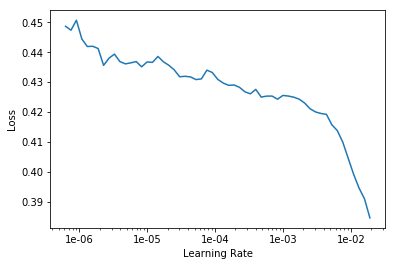

In [38]:
my_learner.lr_find()
my_learner.recorder.plot()


In [40]:
my_learner.fit_one_cycle(1, max_lr = 1e-02, wd = 0.01)
#my_learner.fit_one_cycle(3, max_lr=slice(None, 1e-03, 1e-02), wd = 0.1)


Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
Conv1: torch.Size([32, 56, 459])
Maxpool: torch.Size([32, 56, 153])
Linear1 torch.Size([32, 56, 1])
Reshape torch.Size([32, 56])
End: torch.Size([32, 2])
End: tensor([[ 0.4361, -0.7825],
        [-0.4504,  0.4232],
        [ 0.3467, -0.6206],
        [ 0.8183, -1.2291]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
Conv1: torch.Size([32, 56, 459])
Maxpool: torch.Size([32, 56, 153])
Linear1 torch.Size([32, 56, 1])
Reshape torch.Size([32, 56])
End: torch.Size([32, 2])
End: tensor([[-0.2257,  0.4139],
        [-0.9219,  1.2379],
        [-0.0326,  0.0523],
        [-0.1800,  0.3135]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
Conv1: torch.Size([32, 56, 459])
Maxpool: torch.Size([32, 56, 153])
Linear1 torch.Size([32, 56, 1])
Reshape torch.Size([32, 56])
End: torch.Size([32, 2])
End: 


Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
Conv1: torch.Size([32, 56, 459])
Maxpool: torch.Size([32, 56, 153])
Linear1 torch.Size([32, 56, 1])
Reshape torch.Size([32, 56])
End: torch.Size([32, 2])
End: tensor([[-0.5036,  0.4662],
        [-1.2760,  1.3845],
        [ 0.3758, -0.8713],
        [ 0.4380, -0.6902]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
Conv1: torch.Size([32, 56, 459])
Maxpool: torch.Size([32, 56, 153])
Linear1 torch.Size([32, 56, 1])
Reshape torch.Size([32, 56])
End: torch.Size([32, 2])
End: tensor([[ 0.3988, -0.6678],
        [-0.9052,  1.2064],
        [ 0.2589, -0.7849],
        [ 0.2252, -0.3766]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
Conv1: torch.Size([32, 56, 459])
Maxpool: torch.Size([32, 56, 153])
Linear1 torch.Size([32, 56, 1])
Reshape torch.Size([32, 56])
End: torch.Size([32, 2])
End: 


Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
Conv1: torch.Size([32, 56, 459])
Maxpool: torch.Size([32, 56, 153])
Linear1 torch.Size([32, 56, 1])
Reshape torch.Size([32, 56])
End: torch.Size([32, 2])
End: tensor([[ 0.9609, -1.1579],
        [ 0.0355, -0.6275],
        [ 1.0332, -1.2294],
        [ 1.9059, -2.3720]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
Conv1: torch.Size([32, 56, 459])
Maxpool: torch.Size([32, 56, 153])
Linear1 torch.Size([32, 56, 1])
Reshape torch.Size([32, 56])
End: torch.Size([32, 2])
End: tensor([[ 0.8702, -0.9569],
        [ 0.9163, -1.1584],
        [-2.6108,  2.5553],
        [-0.3274,  0.6343]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
Conv1: torch.Size([32, 56, 459])
Maxpool: torch.Size([32, 56, 153])
Linear1 torch.Size([32, 56, 1])
Reshape torch.Size([32, 56])
End: torch.Size([32, 2])
End: 


Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
Conv1: torch.Size([32, 56, 459])
Maxpool: torch.Size([32, 56, 153])
Linear1 torch.Size([32, 56, 1])
Reshape torch.Size([32, 56])
End: torch.Size([32, 2])
End: tensor([[ 0.5119, -0.2025],
        [-0.9329,  1.4493],
        [ 0.1427, -0.1954],
        [ 1.1664, -1.1871]], device='cuda:0')

Input torch.Size([28, 468, 56])
Transposed: torch.Size([28, 56, 468])
Conv1: torch.Size([28, 56, 459])
Maxpool: torch.Size([28, 56, 153])
Linear1 torch.Size([28, 56, 1])
Reshape torch.Size([28, 56])
End: torch.Size([28, 2])
End: tensor([[-0.3971,  0.2852],
        [ 1.0639, -1.2772],
        [-0.7295,  0.8800],
        [-1.1175,  1.0724]], device='cuda:0')


In [95]:
my_learner.load("Simple_model_stage1")

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f7fadaf8518>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f7fadaf8358>;

Test: None, model=Model(
  (conv1): Conv1d(56, 56, kernel_size=(10,), stride=(1,))
  (Maxpool): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (Linear1): Linear(in_features=153, out_features=1, bias=True)
  (Linear2): Linear(in_features=56, out_features=2, bias=True)
), opt_func=<class 'torch.optim.adam.Adam'>, loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x7f7faf15e598>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[<class 'fastai.basic_train.Recorder'>], callbacks=[], layer_groups=[Sequential(
  (0): Conv1d(56, 56, kernel_size=(10,), stride=(1,))
  (1): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (2): Linear(in_features=153, out_features=1, bias=True)
  (3): Linear(in_feature

In [93]:
my_learner.save("Simple_model_stage2")

In [94]:
stats() #stage 1

Correct: 0.784
AUC 0.834
MCC 0.569
AVP 0.839

Tn, fp, fn, tp
[[162  50]
 [ 39 161]]
TPR: 0.805
TNR: 0.764


### Separate conv model

In [614]:
#dfs[0]["Type"] = 0
#dfs[0]["Type"].iloc[0:181] = 1
#dfs[0]["Type"].iloc[181:192] = 2
#dfs[0]["Type"].iloc[192:330] = 3
#dfs[0]["Type"].iloc[330:468] = 4

In [1]:
batch_size = 32
#secret_size = 401
n_hid = 40
my_data_bunch = DataBunch.create(train_ds, valid_ds, bs=batch_size)
criterion = nn.CrossEntropyLoss()

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        #Conv1
        self.conv1_pmhc = nn.Conv1d(in_channels = 56, out_channels = n_hid, kernel_size = 1)
        self.conv2_pmhc = nn.Conv1d(in_channels = 56, out_channels = n_hid, kernel_size = 3)
        self.conv3_pmhc = nn.Conv1d(in_channels = 56, out_channels = n_hid, kernel_size = 5)
        self.conv4_pmhc = nn.Conv1d(in_channels = 56, out_channels = n_hid, kernel_size = 7)
        self.conv5_pmhc = nn.Conv1d(in_channels = 56, out_channels = n_hid, kernel_size = 9)
        
        self.conv1_tcr = nn.Conv1d(in_channels = 56, out_channels = n_hid, kernel_size = 1)
        self.conv2_tcr = nn.Conv1d(in_channels = 56, out_channels = n_hid, kernel_size = 3)
        self.conv3_tcr = nn.Conv1d(in_channels = 56, out_channels = n_hid, kernel_size = 5)
        self.conv4_tcr = nn.Conv1d(in_channels = 56, out_channels = n_hid, kernel_size = 7)
        self.conv5_tcr = nn.Conv1d(in_channels = 56, out_channels = n_hid, kernel_size = 9)
        
        #Conv2
        self.conv1_pmhc_tcr = nn.Conv1d(in_channels = n_hid, out_channels = 1, kernel_size = 1)
        self.conv2_pmhc_tcr = nn.Conv1d(in_channels = n_hid, out_channels = 1, kernel_size = 1)
        self.conv3_pmhc_tcr = nn.Conv1d(in_channels = n_hid, out_channels = 1, kernel_size = 1)
        self.conv4_pmhc_tcr = nn.Conv1d(in_channels = n_hid, out_channels = 1, kernel_size = 1)
        self.conv5_pmhc_tcr = nn.Conv1d(in_channels = n_hid, out_channels = 1, kernel_size = 1)
        
        #Standardize
        #C: torch.Size([32, 15, 468]) torch.Size([32, 15, 464]) torch.Size([32, 15, 460]) torch.Size([32, 15, 456]) torch.Size([32, 15, 452])
        self.Linear1_pmhc_tcr = nn.Linear(in_features = 468, out_features = 468)
        self.Linear2_pmhc_tcr = nn.Linear(in_features = 464, out_features = 468)
        self.Linear3_pmhc_tcr = nn.Linear(in_features = 460, out_features = 468)
        self.Linear4_pmhc_tcr = nn.Linear(in_features = 456, out_features = 468)
        self.Linear5_pmhc_tcr = nn.Linear(in_features = 452, out_features = 468)
        
        #maxpool
        self.max1_pmhc_tcr = nn.MaxPool1d(kernel_size=3)
        self.max2_pmhc_tcr = nn.MaxPool1d(kernel_size=3)
        self.max3_pmhc_tcr = nn.MaxPool1d(kernel_size=3)
        self.max4_pmhc_tcr = nn.MaxPool1d(kernel_size=3)
        self.max5_pmhc_tcr = nn.MaxPool1d(kernel_size=3)
        
        #self.Maxpool = nn.MaxPool1d(kernel_size=3)
        self.conv1 = nn.Conv1d(in_channels = 5, out_channels = 1, kernel_size = 1)
        self.Linear1 = nn.Linear(in_features = 156, out_features = 2)
        
        
        #self.Linear2 = nn.Linear(in_features = n_hid, out_features = 2)

    def forward(self, x):
        bs_reshape = x.shape[0]
        print("\nInput", x.shape)
        x = x.transpose(1, 2)
        print("Transposed:", x.shape)
        #x = x[:, 0:20]
        
        #Conv1
        pmhc = x[:, :, 0:192]
        tcr = x[:, :, 192:468]

        pmhc1 = self.conv1_pmhc(pmhc)
        pmhc2 = self.conv2_pmhc(pmhc)
        pmhc3 = self.conv3_pmhc(pmhc)
        pmhc4 = self.conv4_pmhc(pmhc)
        pmhc5 = self.conv5_pmhc(pmhc)
        
        tcr1 = self.conv1_tcr(tcr)
        tcr2 = self.conv2_tcr(tcr)
        tcr3 = self.conv3_tcr(tcr)
        tcr4 = self.conv4_tcr(tcr)
        tcr5 = self.conv5_tcr(tcr)
        
        c1 = torch.cat([pmhc1, tcr1], 2)
        c2 = torch.cat([pmhc2, tcr2], 2)
        c3 = torch.cat([pmhc3, tcr3], 2)
        c4 = torch.cat([pmhc4, tcr4], 2)
        c5 = torch.cat([pmhc5, tcr5], 2)
        print("C:", c1.shape, c2.shape, c3.shape, c4.shape, c5.shape)
        
        #Standardize cats
        c1 = self.Linear1_pmhc_tcr(c1)
        c2 = self.Linear2_pmhc_tcr(c2)
        c3 = self.Linear3_pmhc_tcr(c3)
        c4 = self.Linear4_pmhc_tcr(c4)
        c5 = self.Linear5_pmhc_tcr(c5)
        #print("standard C:", c1.shape, c2.shape, c3.shape, c4.shape, c5.shape)
        
        #Conv2
        pmhc_tcr1 = self.conv1_pmhc_tcr(c1)
        pmhc_tcr2 = self.conv2_pmhc_tcr(c2)
        pmhc_tcr3 = self.conv3_pmhc_tcr(c3)
        pmhc_tcr4 = self.conv4_pmhc_tcr(c4)
        pmhc_tcr5 = self.conv5_pmhc_tcr(c5)
        #print("pmhc_tcr5:", pmhc_tcr5.shape)
        
        a1 = self.max1_pmhc_tcr(pmhc_tcr1)
        a2 = self.max2_pmhc_tcr(pmhc_tcr2)
        a3 = self.max3_pmhc_tcr(pmhc_tcr3)
        a4 = self.max4_pmhc_tcr(pmhc_tcr4)
        a5 = self.max5_pmhc_tcr(pmhc_tcr5)
        print("Maxpool a5", a5.shape)
        
        #Deep layer
        x = torch.cat([a1,a2,a3,a4,a5], dim = 1)
        print("x", x.shape)
        
        x = self.conv1(x)
        print("Conv", x.shape)
        
        x = self.Linear1(x)
        print("Linear1", x.shape)
        
        x = x.reshape(bs_reshape, x.shape[2])
        print("End:", x.shape)
        #print("End:", x[0:4])
        return x

#print(net)  
#print( 'trainable params: {}'.format(count_model_params(net)) )
net = Model().cuda()

my_learner = Learner(my_data_bunch,
                     net,
                     opt_func=torch.optim.Adam,
                     loss_func=criterion, metrics=accuracy, bn_wd = False)
#my_learner.fit_one_cycle(1, 0.01)


NameError: name 'DataBunch' is not defined

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


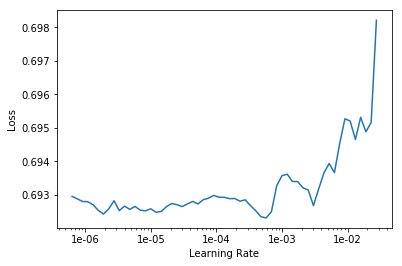

In [125]:
my_learner.lr_find()
my_learner.recorder.plot()


In [127]:
my_learner.fit_one_cycle(2, 1e-03, wd = 0.01)
#my_learner.fit_one_cycle(3, max_lr=slice(None, 1e-03, 5e-02), wd = 0.01)


Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156

x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) tor


Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156


Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156


Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156


Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156])
Linear1 torch.Size([32, 1, 2])
End: torch.Size([32, 2])

Input torch.Size([32, 468, 56])
Transposed: torch.Size([32, 56, 468])
C: torch.Size([32, 40, 468]) torch.Size([32, 40, 464]) torch.Size([32, 40, 460]) torch.Size([32, 40, 456]) torch.Size([32, 40, 452])
Maxpool a5 torch.Size([32, 1, 156])
x torch.Size([32, 5, 156])
Conv torch.Size([32, 1, 156

In [101]:
my_learner.save("Complex_1")

In [ ]:
my_learner.load("Complex_1")

In [112]:
stats()

Correct: 0.648
AUC 0.813
MCC 0.331
AVP 0.768

Tn, fp, fn, tp
[[191  21]
 [124  76]]
TPR: 0.38
TNR: 0.901


In [ ]:
#Stage 1 0.68

In [91]:
stats()

Correct: 0.784
AUC 0.834
MCC 0.569
AVP 0.839

Tn, fp, fn, tp
[[162  50]
 [ 39 161]]
TPR: 0.805
TNR: 0.764


In [92]:
my_learner.save("Stage_2")

In [656]:
my_learner.load("Stage_1")

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f07658b2c18>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f07658b2048>;

Test: None, model=Model(
  (conv_pmhc): Conv1d(56, 56, kernel_size=(10,), stride=(1,))
  (conv_tcr): Conv1d(56, 56, kernel_size=(10,), stride=(1,))
  (Maxpool_pmhc): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (Maxpool_tcr): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (Linear_tcr): Linear(in_features=89, out_features=61, bias=True)
  (conv_pmhc_tcr): Conv1d(112, 61, kernel_size=(10,), stride=(1,))
  (Maxpool_pmhc_tcr): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (Linear1): Linear(in_features=17, out_features=1, bias=True)
  (Linear2): Linear(in_features=61, out_features=2, bias=True)
), opt_func=<class 'torch.optim.adam.Adam'>, loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x7f07a1385510>], true_wd=Tru

In [752]:
my_learner.save("Full2")

In [431]:
my_learner.load("Full2")

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f076c262dd8>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f076c262048>;

Test: None, model=Model(
  (conv1): Conv1d(20, 20, kernel_size=(10,), stride=(1,))
  (Maxpool): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (Linear1): Linear(in_features=153, out_features=1, bias=True)
  (Linear2): Linear(in_features=20, out_features=2, bias=True)
), opt_func=<class 'torch.optim.adam.Adam'>, loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x7f07a1385510>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[<class 'fastai.basic_train.Recorder'>], callbacks=[], layer_groups=[Sequential(
  (0): Conv1d(20, 20, kernel_size=(10,), stride=(1,))
  (1): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (2): Linear(in_features=153, out_features=1, bias=True)
  (3): Linear(in_feature

In [433]:
my_learner.fit_one_cycle(20, 0.01)


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 3.7948, -3.8266],
        [-1.8314,  1.8587],
        [-0.1048,  0.4933],
        [ 2.8906, -3.2500]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 2.3940, -2.2736],
        [ 1.8917, -1.4447],
        [ 4.5452, -4.4496],
        [ 3.7476, -3.3810]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 2.9679, -2.4487],
        [-1.6781,  2.0109],
        [-1.3919,  1.3317],
        [-1.6781,  2.0109]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 2.7134, -2.0167],
        [-1.3987,  2.0470],
        [-1.9598,  2.1289],
        [-1.5716,  1.6310]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 0.8835, -0.7766],
        [-2.5035,  3.0799],
        [-1.9206,  1.9154],
        [ 0.2540,  0.1215]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 2.6417, -2.3881],
        [-1.4315,  1.7461],
        [ 1.9415, -1.3702],
        [ 3.9963, -3.5838]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.7011,  1.7696],
        [ 2.2870, -1.9951],
        [-1.8301,  2.0030],
        [ 2.6879, -2.0742]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 0.2549,  0.0447],
        [ 4.4559, -4.6558],
        [ 3.8684, -3.8046],
        [ 3.1816, -2.6581]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 3.0958, -2.4191],
        [-1.2372,  1.8616],
        [-2.0162,  2.2282],
        [-1.1760,  1.1859]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-0.0682, -0.0163],
        [-1.8557,  2.0751],
        [-2.5310,  3.0720],
        [ 0.5886, -0.3930]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.9205,  2.2541],
        [-1.9818,  2.4312],
        [ 4.4654, -4.7879],
        [-2.3512,  2.3470]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-3.4979,  3.5428],
        [-2.9549,  3.1152],
        [ 2.0251, -1.9552],
        [ 2.6004, -2.5212]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 5.8089, -5.3130],
        [ 4.2272, -3.9639],
        [-2.3840,  2.6024],
        [-1.8770,  2.3521]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.5336,  1.4747],
        [ 5.7652, -5.4603],
        [ 2.1565, -1.6926],
        [ 2.8648, -2.7352]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-0.5731,  0.6117],
        [-2.4231,  2.6749],
        [-4.3574,  5.0405],
        [ 0.4359, -0.1236]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 4.3884, -4.3509],
        [-0.3833,  0.7682],
        [ 4.1232, -4.0287],
        [ 0.4359, -0.1236]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 2.4519, -1.9055],
        [-2.7666,  2.8701],
        [-1.2374,  2.1521],
        [ 4.4457, -3.9764]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-3.7596,  3.8482],
        [ 1.6344, -1.2838],
        [ 3.8106, -3.9193],
        [ 3.1034, -3.0404]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-2.0752,  2.5381],
        [-3.6204,  4.1453],
        [ 5.5226, -5.1235],
        [-0.2792,  1.0842]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 3.8346, -3.6663],
        [-2.7388,  3.1693],
        [-2.6807,  3.0673],
        [ 3.2100, -3.1936]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 4.7961, -4.6222],
        [ 0.3718,  0.2123],
        [ 5.0134, -4.4916],
        [ 0.1214,  0.4374]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 3.0860, -2.4614],
        [ 2.8937, -2.2367],
        [-3.5694,  4.3481],
        [-2.0214,  2.3434]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 4.3543, -4.0985],
        [ 2.9964, -2.7197],
        [-3.1892,  3.7517],
        [-2.6432,  2.5828]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-3.8376,  4.0037],
        [-2.6768,  3.2796],
        [ 4.4675, -4.8201],
        [ 2.3691, -1.8293]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-3.4875,  3.5511],
        [ 2.7202, -2.8906],
        [ 2.0824, -2.2286],
        [ 3.0408, -3.2660]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.2577,  1.2033],
        [-1.2435,  1.6001],
        [-2.5244,  3.2405],
        [ 3.8000, -3.1629]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 2.7210, -2.1388],
        [ 1.7844, -1.2848],
        [-3.6681,  4.2895],
        [-3.5341,  3.8118]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.1997,  1.3542],
        [-1.1376,  1.8725],
        [ 3.6129, -3.1933],
        [ 3.7791, -3.6820]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-0.2681,  0.4822],
        [ 3.5468, -3.6649],
        [ 3.0321, -2.4953],
        [-2.3240,  2.3348]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-0.8381,  0.8217],
        [-1.2337,  1.6866],
        [-2.8177,  3.0728],
        [ 5.7450, -6.0293]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-3.6393,  3.6048],
        [ 2.8768, -2.0013],
        [-3.6393,  3.6048],
        [-2.2788,  2.3282]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 3.0634, -2.6955],
        [-2.6600,  3.3334],
        [ 4.7033, -4.1461],
        [ 4.4879, -3.9530]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 3.1910, -2.9497],
        [ 4.6481, -4.9843],
        [-4.8026,  5.1312],
        [-4.4650,  4.8476]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.2689,  1.6966],
        [-1.2689,  1.6966],
        [-3.6205,  3.6244],
        [-1.2453,  1.5535]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.3143,  2.2638],
        [ 4.7450, -4.7196],
        [-2.7196,  2.5038],
        [-4.5060,  4.9354]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.9772,  2.6675],
        [-3.2264,  3.5279],
        [ 2.9259, -2.7830],
        [-2.1541,  3.0485]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 7.1632, -7.4397],
        [ 3.8086, -3.8379],
        [-4.2904,  4.3354],
        [ 2.8628, -2.4499]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-3.0901,  3.6822],
        [ 3.8168, -3.9517],
        [-2.6050,  2.5218],
        [ 6.4165, -6.1273]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.1736,  1.4223],
        [-5.7604,  6.5464],
        [ 5.2618, -4.3860],
        [ 2.5938, -2.5432]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-3.4010,  3.2348],
        [ 2.7777, -2.3456],
        [ 5.2943, -4.2972],
        [ 2.9518, -2.0568]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 4.7448, -4.2584],
        [-1.8171,  2.1507],
        [-2.0295,  1.9333],
        [-1.8171,  2.1507]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 3.8082, -2.9575],
        [-1.9999,  2.7444],
        [-4.0174,  4.1784],
        [-2.0331,  2.1824]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.9560,  2.9443],
        [ 2.6527, -2.6978],
        [ 1.7662, -1.7630],
        [-2.6869,  2.8271]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-4.7472,  4.9650],
        [-2.1429,  2.4931],
        [ 3.5388, -3.2156],
        [ 3.5243, -3.1563]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 0.8217, -0.8760],
        [ 7.9342, -7.5951],
        [ 5.5734, -5.4755],
        [ 2.4548, -2.6310]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-4.2659,  4.3413],
        [-2.4497,  2.3564],
        [-3.3608,  3.4461],
        [-4.9889,  5.4366]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-1.1020,  1.1522],
        [-3.6408,  3.5352],
        [-6.2248,  7.0126],
        [-0.7703,  1.0118]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 4.6155, -4.5316],
        [-1.3176,  1.8175],
        [ 7.0335, -6.8208],
        [-0.7703,  1.0118]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 4.2818, -3.8144],
        [ 8.1096, -7.0766],
        [-2.0619,  2.4128],
        [ 4.9677, -5.7526]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 0.7979, -0.7668],
        [-4.4184,  4.6012],
        [ 3.5381, -3.7756],
        [-3.4825,  3.6888]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-2.0580,  2.2714],
        [-2.4484,  2.4575],
        [ 4.3679, -3.9588],
        [-2.9529,  3.9588]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-3.4515,  3.2713],
        [ 4.0789, -2.5955],
        [ 3.2399, -2.8763],
        [ 5.0596, -4.9720]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 4.9008, -4.8396],
        [-1.4609,  1.9738],
        [ 7.1873, -6.9738],
        [-0.7307,  0.9695]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 3.9659, -3.3022],
        [ 1.9887, -1.4992],
        [-5.5776,  6.2489],
        [-4.5434,  4.8460]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 1.9691, -2.5421],
        [-3.5330,  3.7382],
        [ 9.1498, -8.0951],
        [ 6.7262, -6.4264]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 3.6783, -3.3466],
        [-2.3291,  3.0094],
        [-4.1894,  4.2322],
        [ 3.4154, -3.6052]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 5.9513, -5.0773],
        [-2.9068,  3.9096],
        [-3.2811,  3.9394],
        [ 6.4095, -6.7553]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 4.8310, -4.3387],
        [ 3.2649, -2.6121],
        [ 5.5559, -5.4653],
        [ 4.3175, -4.3956]], device='cuda:0', grad_fn=<SliceBackward>)

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.


Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[ 3.9829, -3.3207],
        [ 1.9995, -1.5107],
        [-5.5739,  6.2444],
        [-4.5498,  4.8513]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1])
Reshape torch.Size([20, 20])
End: torch.Size([20, 2])
End: tensor([[-2.5154,  2.7339],
        [-1.8838,  2.5930],
        [ 4.4166, -3.9605],
        [ 4.9118, -4.8515]], device='cuda:0')

Input torch.Size([20, 468, 56])
Transposed: torch.Size([20, 56, 468])
Simplified torch.Size([20, 20, 468])
Conv1: torch.Size([20, 20, 459])
Maxpool: torch.Size([20, 20, 153])
Linear1 torch.Size([20, 20, 1]

In [439]:
preds = my_learner.get_preds()

In [445]:
preds[0]

tensor([[1.4590e-02, 9.8541e-01],
        [9.9982e-01, 1.7597e-04],
        [9.9818e-01, 1.8201e-03],
        [6.9313e-03, 9.9307e-01],
        [8.4556e-04, 9.9915e-01],
        [1.1909e-03, 9.9881e-01],
        [8.6890e-01, 1.3110e-01],
        [9.9800e-01, 1.9957e-03],
        [3.5696e-03, 9.9643e-01],
        [2.8101e-06, 1.0000e+00],
        [1.7550e-02, 9.8245e-01],
        [9.9923e-01, 7.7374e-04],
        [9.9985e-01, 1.4954e-04],
        [9.9800e-01, 1.9957e-03],
        [5.6474e-04, 9.9944e-01],
        [9.9925e-01, 7.4645e-04],
        [2.7506e-06, 1.0000e+00],
        [2.1530e-04, 9.9978e-01],
        [1.2434e-02, 9.8757e-01],
        [1.7550e-02, 9.8245e-01],
        [1.1220e-02, 9.8878e-01],
        [3.6075e-02, 9.6392e-01],
        [7.7175e-05, 9.9992e-01],
        [1.0000e+00, 1.4865e-06],
        [9.8245e-03, 9.9018e-01],
        [3.5696e-03, 9.9643e-01],
        [9.9999e-01, 5.1973e-06],
        [9.2483e-03, 9.9075e-01],
        [3.0498e-05, 9.9997e-01],
        [4.290

In [446]:
preds[1]

tensor([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [ ]:
my_learner.get_preds()[

In [435]:
test_ds.tensors[1][11:20]

tensor([0, 0, 0, 1, 0, 1, 1, 1, 1])

### Analysis

In [799]:
preds = my_learner.get_preds()

In [800]:
preds[0].shape

torch.Size([394, 2])

In [53]:
preds = my_learner.get_preds()

In [90]:
def stats():
    #Get raw predictions
    preds = my_learner.get_preds()
    outputs = preds[0]
    targets = preds[1]

    #Find highest multi-class prediction (yes, this is wrong ...)
    yhat = []

    for i in range(len(outputs)):
        pred = outputs[i].tolist()
        pred = pred.index(max(pred))
        yhat.append(pred)

    #Pairwise comparison
    yhat = np.array(yhat)
    y_true = np.array(targets)
    y_scores = outputs[:, 1]
    y_scores_binary = np.where(y_scores > 0.5, 1, 0)

    correct = yhat == y_true
    auc = roc_auc_score(y_true, y_scores)
    mcc = matthews_corrcoef(y_true, y_scores_binary)
    avp = average_precision_score(y_true, y_scores)

    print("Correct:", round(sum(correct) / len(targets), 3))
    print("AUC", round(auc, 3))
    print("MCC", round(mcc, 3))
    print("AVP", round(avp, 3))

    print("\nTn, fp, fn, tp")
    print(metrics.confusion_matrix(y_true, yhat))
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, yhat).ravel()
    tpr = (tp / (tp+fn))
    tnr = (tn / (tn+fp))
    print("TPR:", round(tpr, 3))
    print("TNR:", round(tnr, 3))



In [71]:
outputs

tensor([[0.9670, 0.0330],
        [0.7310, 0.2690],
        [0.0736, 0.9264],
        [0.3890, 0.6110],
        [0.1179, 0.8821],
        [0.8717, 0.1283],
        [0.7664, 0.2336],
        [0.7515, 0.2485],
        [0.0104, 0.9896],
        [0.0523, 0.9477],
        [0.0129, 0.9871],
        [0.7522, 0.2478],
        [0.9348, 0.0652],
        [0.2054, 0.7946],
        [0.9651, 0.0349],
        [0.8570, 0.1430],
        [0.3981, 0.6019],
        [0.8422, 0.1578],
        [0.2108, 0.7892],
        [0.1752, 0.8248],
        [0.1667, 0.8333],
        [0.7723, 0.2277],
        [0.8577, 0.1423],
        [0.8958, 0.1042],
        [0.0792, 0.9208],
        [0.1267, 0.8733],
        [0.0845, 0.9155],
        [0.3047, 0.6953],
        [0.9598, 0.0402],
        [0.2313, 0.7687],
        [0.9132, 0.0868],
        [0.8709, 0.1291],
        [0.4083, 0.5917],
        [0.9216, 0.0784],
        [0.8558, 0.1442],
        [0.8763, 0.1237],
        [0.1797, 0.8203],
        [0.9436, 0.0564],
        [0.6

In [72]:
targets

tensor([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [68]:
y_true

array([0, 1, 1, 1, ..., 1, 1, 1, 0])

In [67]:
y_scores

tensor([0.9670, 0.7310, 0.0736, 0.3890, 0.1179, 0.8717, 0.7664, 0.7515, 0.0104,
        0.0523, 0.0129, 0.7522, 0.9348, 0.2054, 0.9651, 0.8570, 0.3981, 0.8422,
        0.2108, 0.1752, 0.1667, 0.7723, 0.8577, 0.8958, 0.0792, 0.1267, 0.0845,
        0.3047, 0.9598, 0.2313, 0.9132, 0.8709, 0.4083, 0.9216, 0.8558, 0.8763,
        0.1797, 0.9436, 0.6882, 0.6882, 0.1667, 0.7659, 0.7789, 0.0162, 0.6714,
        0.5837, 0.9548, 0.8829, 0.7123, 0.2455, 0.9580, 0.6159, 0.2108, 0.1479,
        0.9383, 0.9710, 0.5497, 0.1137, 0.3358, 0.3472, 0.1007, 0.3070, 0.8119,
        0.0792, 0.4255, 0.3047, 0.1667, 0.9725, 0.0892, 0.9621, 0.6785, 0.1018,
        0.9348, 0.4204, 0.3139, 0.4558, 0.4653, 0.0120, 0.0356, 0.0199, 0.3358,
        0.1752, 0.3047, 0.9249, 0.2194, 0.7617, 0.0133, 0.7515, 0.1785, 0.9494,
        0.2892, 0.1267, 0.8772, 0.2089, 0.2845, 0.3139, 0.9511, 0.7310, 0.0845,
        0.1667, 0.3047, 0.2054, 0.1667, 0.8413, 0.9122, 0.9383, 0.8908, 0.9660,
        0.6269, 0.4083, 0.9348, 0.8150, 

In [62]:
outputs[:, 0]

tensor([0.9670, 0.7310, 0.0736, 0.3890, 0.1179, 0.8717, 0.7664, 0.7515, 0.0104,
        0.0523, 0.0129, 0.7522, 0.9348, 0.2054, 0.9651, 0.8570, 0.3981, 0.8422,
        0.2108, 0.1752, 0.1667, 0.7723, 0.8577, 0.8958, 0.0792, 0.1267, 0.0845,
        0.3047, 0.9598, 0.2313, 0.9132, 0.8709, 0.4083, 0.9216, 0.8558, 0.8763,
        0.1797, 0.9436, 0.6882, 0.6882, 0.1667, 0.7659, 0.7789, 0.0162, 0.6714,
        0.5837, 0.9548, 0.8829, 0.7123, 0.2455, 0.9580, 0.6159, 0.2108, 0.1479,
        0.9383, 0.9710, 0.5497, 0.1137, 0.3358, 0.3472, 0.1007, 0.3070, 0.8119,
        0.0792, 0.4255, 0.3047, 0.1667, 0.9725, 0.0892, 0.9621, 0.6785, 0.1018,
        0.9348, 0.4204, 0.3139, 0.4558, 0.4653, 0.0120, 0.0356, 0.0199, 0.3358,
        0.1752, 0.3047, 0.9249, 0.2194, 0.7617, 0.0133, 0.7515, 0.1785, 0.9494,
        0.2892, 0.1267, 0.8772, 0.2089, 0.2845, 0.3139, 0.9511, 0.7310, 0.0845,
        0.1667, 0.3047, 0.2054, 0.1667, 0.8413, 0.9122, 0.9383, 0.8908, 0.9660,
        0.6269, 0.4083, 0.9348, 0.8150, 

In [55]:
stats(preds)

Correct predictions: 161.5
Tn, fp, fn, tp
[[162  50]
 [ 39 161]]
TNR: 0.7641509433962265
TPR: 0.805


In [465]:
tnr

12.0

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true, yhat).ravel()
print(tn, fp, fn, tp)

fpr, tpr, _ = metrics.roc_curve(y_true.ravel(), yhat.ravel())
roc_auc = metrics.auc(fpr, tpr)

#def L1(yHat, y):
#    return (np.sum(np.absolute(yHat - y)**2) / y.size)

#rmse = L1(pred_vec_all, y_test_all)
#mcc = matthews_corrcoef(y_test_all, y_binary)
#avp = average_precision_score(y_true = y_binary, y_score = y_test_all)

In [ ]:
print(tn, fp, fn, tp)

print(roc_auc)

In [ ]:
for yhat, y_true in zip(yhat, y_true):
    print(yhat, y_true)

In [ ]:
np.where(yhat == y_true, 1, 0)[0:10]

In [ ]:
length = len(my_learner.data.valid_ds[:][1])
pred_true = int(sum(my_learner.data.valid_ds[:][1]))
pred_false = length - pred_true
length, pred_true, pred_false

In [ ]:
np.where()

In [ ]:
len(my_learner.data.valid_ds[:][1]) / sum (my_learner.data.valid_ds[:][1])

In [ ]:
len(my_learner.data.valid_ds[:][1])

In [ ]:
my_learner.lr_find()
my_learner.recorder.plot()


### Working model

In [ ]:
!gpustat

In [ ]:
def count_model_params(net):
    return sum(p.numel() for p in net.parameters() if p.requires_grad)

In [ ]:
batch_size = 1
my_data_bunch = DataBunch.create(train_ds,valid_ds,test_ds,bs=batch_size)
criterion = nn.CrossEntropyLoss() 

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv1d(in_channels = 405, out_channels = 1, kernel_size = 1)

    def forward(self, x):
        input_size = x.shape[0]
        print("Input", x.shape)
        
        x = self.conv1(x)
        print("After conv:", x.shape)
        x = x.reshape(input_size, 5)
        print("\nEnd:", x.shape)
        print("End:", x)
        return x

print(net)  
print( 'trainable params: {}'.format(count_model_params(net)) )
net = Model().cuda()

my_learner = Learner(my_data_bunch,
                     net,
                     opt_func=torch.optim.Adam,
                     loss_func=criterion, metrics=accuracy_thresh)
my_learner.fit_one_cycle(1, 5e-02)


In [ ]:
my_learner.lr_find()
my_learner.recorder.plot()


In [ ]:
preds = my_learner.get_preds() #get valdation preds, 256
preds[0]

In [ ]:
np.where(preds[0] >= 0.5, 1, 0)

In [ ]:
my_learner.data.valid_ds[:][1]

In [ ]:
preds = my_learner.get_preds() #get valdation preds, 256
preds[0]

### Continued

In [ ]:
my_learner.save("Stage 0")

In [ ]:
my_learner.fit_one_cycle(5,5e-02)

In [ ]:
my_learner.save("Stage 1")

In [ ]:
my_learner.load("Stage 1")

In [ ]:
my_learner.lr_find()
my_learner.recorder.plot()


### NN test model

In [ ]:
def count_model_params(net):
    return sum(p.numel() for p in net.parameters() if p.requires_grad)

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1*9, 5)
        self.maxpool = nn.MaxPool1d(kernel_size = 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return x

net = Net()
print(net)
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

input = torch.randn(1, 9)
input = my_data_bunch.train_ds[0][0]
out = net(input)
print(out.shape)
print(out)
print(input.shape)

In [ ]:
my_learner.fit_one_cycle(10,1e-1)


In [ ]:
batch_size = 1
my_data_bunch = DataBunch.create(train_ds,valid_ds,test_ds,bs=batch_size)

criterion = nn.CrossEntropyLoss() # NLL + Log_softmax layer = multi-class Cross-entropy

class Net(nn.Module):
    def __init__(self, input_size=(1*9), hidden_size=9, num_classes=1):
        super(Net, self).__init__()
        self.fc_0 = nn.Linear(input_size, hidden_size)
        self.relu_0 = nn.ReLU()
        self.fc_1 = nn.Linear(hidden_size,hidden_size)        
        self.relu_1 = nn.ReLU()
        self.last = nn.Linear(hidden_size,num_classes)
        self.log_softmax_layer = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        out = self.fc_0(x)
        out = self.relu_1(self.fc_0(out))
        out = self.last(out)
        print(out.shape)
        #out = self.log_softmax_layer(out)
        out = self.log_softmax_layer(out)
        #out = out.flatten()
        print(out.shape)
        print(out)
        return out
    
#create instance of model
net = Net(input_size=(1*9),hidden_size=9,num_classes=1).cuda()
print(net)  
print( 'trainable params: {}'.format(count_model_params(net)) )

my_learner = Learner(my_data_bunch,
                     net,
                     opt_func=torch.optim.Adam,
                     loss_func=criterion)
my_learner.fit_one_cycle(1,1e-1)

In [ ]:
my_learner.lr_find()
my_learner.recorder.plot()


In [ ]:
my_learner.fit_one_cycle(1,1e-1)

In [ ]:
out.flatten().shape

In [ ]:
my_data_bunch.train_ds[0][0].shape

In [ ]:
# pool of size=3, stride=2
m = nn.MaxPool1d(50, stride=1)
input = torch.randn(20, 16, 50)
output = m(input)
output

### 2.b Class definition of model

In [ ]:
y.shape

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size=(9), hidden_size=9, num_classes=3):
        super(Net, self).__init__()
        self.fc_0 = nn.Linear(input_size, hidden_size) 
        self.relu_0 = nn.ReLU()
        self.fc_1 = nn.Linear(hidden_size,hidden_size)        
        self.relu_1 = nn.ReLU()
        self.last = nn.Linear(hidden_size,num_classes)
        self.log_softmax_layer = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        out = self.relu_0(self.fc_0(x))
        out = self.relu_1(self.fc_1(out))
        out = self.log_softmax_layer(self.last(out))
        
        return out
    
#create instance of model
net = Net(input_size=(1),hidden_size=9,num_classes=3).cuda()
print(net)  
print( 'trainable params: {}'.format(count_model_params(net)) )

## 3. Build Learner

In [ ]:
my_learner = Learner(my_data_bunch,
                     net,
                     opt_func=torch.optim.Adam,
                     loss_func=criterion)

#### From here we can use the learner just like any other Fast.ai learner

In [ ]:
my_learner.lr_find()

In [ ]:
my_learner.recorder.plot()

In [ ]:
my_learner.fit_one_cycle(1,1e-1)

In [ ]:
plt.plot(my_learner.recorder.losses[::batch_size]) #losses for each batch.  Take at end of epoch only
plt.plot(my_learner.recorder.val_losses)

In [ ]:
X

In [ ]:
y